# Wave Equation

In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from scipy.integrate import odeint
%matplotlib inline

$$\begin{cases}
    u_t + c u_x &=& 0 \\
    u(0, x) &=& u_0(x)
\end{cases} $$

$$u_t = -c u_{x} \stackrel{FFT}{\Longrightarrow} \hat{u}_t = -c \,i\,\kappa \hat{u} $$

In [2]:
c = 2
L = 20
N = 2000
dx = L / N
x = np.arange(-L / 2, L / 2, dx)
kappa = 2 * np.pi * fftfreq(N, d=dx)

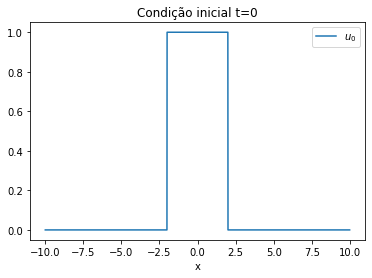

In [3]:
# u0 = 1 / np.cosh(x)

u0 = np.zeros(N)
u0[int((L / 2 - L / 10) / dx):int((L / 2 + L / 10) / dx)] = 1

plt.plot(x, u0, label='$u_0$')
plt.xlabel('x')
plt.title('Condição inicial t=0')
plt.legend()
plt.show()

In [4]:
u0hat = fft(u0)
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))
len(u0hat_ri)

4000

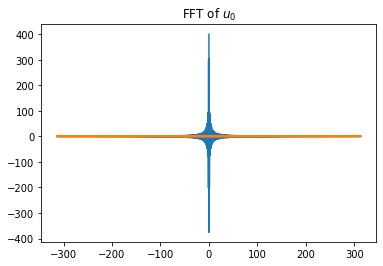

In [5]:
plt.figure()
plt.plot(kappa, u0hat.real)
plt.plot(kappa, u0hat.imag)
plt.title('FFT of $u_0$')
plt.show()

In [6]:
def wave(uhat_ri, t, kappa, c):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -c * (1j) * kappa * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

In [7]:
%%time
dt = 0.025
t = np.arange(0, 10, dt)
uhat_ri = odeint(wave, u0hat_ri, t, args=(kappa, c))
uhat = uhat_ri[:, :N] + (1j) * uhat_ri[:, N:]
len(uhat)

Wall time: 27.2 s


400

In [8]:
u = np.zeros_like(uhat)

for j in range(len(t)):
    u[j:] = ifft(uhat[j:])

u = u.real

In [9]:
# plt.figure()
# for i in range(0, len(t), 9):
#     plt.plot(x, u[i])
#     plt.xlabel('$x$')
#     plt.ylim((min(u0) - .1, max(u0) + .1))
#     plt.title("u(%.1f)" % t[i])
#     plt.show()

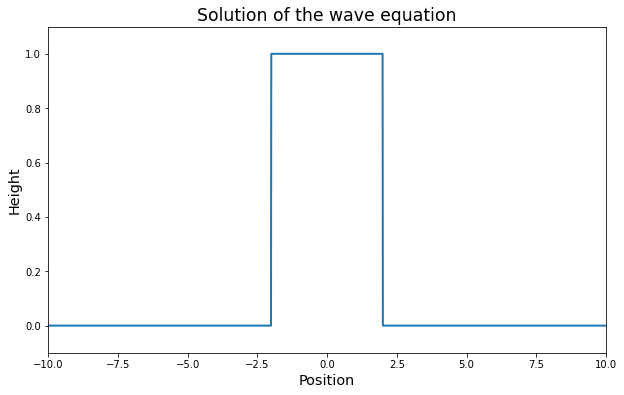

In [10]:
def init():
    line.set_data([], [])
    return line,


def animate(i):
    ax.set_title("Solution of the wave equation", fontsize='xx-large')
    ax.set_xlabel("Position", fontsize='x-large')
    ax.set_ylabel("Height", fontsize='x-large')
    line.set_data(x, u[i])
    return line,


fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-L / 2, L / 2), ylim=(min(u0) - .1, max(u0) + .1))
ax.set_title("Solution of the wave equation", fontsize='xx-large')
ax.set_xlabel("Position", fontsize='x-large')
ax.set_ylabel("Height", fontsize='x-large')
line, = ax.plot(x, u0, lw=2)

In [11]:
anim = FuncAnimation(fig,
                     animate,
                     init_func=init,
                     frames=len(t),
                     interval=1 / dt,
                     blit=True)

In [12]:
%%time
anim.save('wave.gif', writer='pillow', fps=1 / dt)

Wall time: 39.8 s


![](wave.gif)